In [1]:
#導入模型
import pandas as pd
import os #這是指定存取資料夾
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data_topic_M5 = pd.read_csv(r".\PTT_data\Data preprocessing\2022topic_Comment_auto_M5_merge15_1_job.csv")
data_topic_M5.head(2)

,author,title,year,month,date,time,message_data,message,留言日期,message_day,...,message_ip,type,Break_word,POS_tags,Topic,Top_words,Probability,Topic_28,Top_words_28,Probability_28
0,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,10:32,2022/12/22,這是真的我上次去日本玩隔壁車廂就在拍a片我還被找,2022/05 / 05,5月5日,...,0,推,"是,真的,上,次,去,日本,玩,隔壁,車廂,就,在,拍,a片,還,被,找","是 SHI,真的 D,上 Nes,次 Nf,去 VCL,日本 Nc,玩 VC,隔壁 Nc,車...",9,真的 - 可以 - 哈哈 - 厲害 - 聰明 - 不錯 - 這麼 - 恭喜 - 羨慕 - 身家,0.035889,4,真的 - 哈哈 - 可以 - 厲害 - 聰明 - 不錯 - 這麼 - 恭喜 - 羨慕 - 身家,0.024437
1,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,10:23:11,2022/12/22,去拍打雞肉,2022/05 / 05,5月5日,...,0,推,"去,拍打,雞肉","去 D,拍打 VC,雞肉 Na",-1,自來 - 奇蹟 - 五樓 - 離席 - 墜機 - 蚵仔 - 鴿子 - 高歌 - 萬保衛戰 - 樂透,0.952089,-1,自來 - 奇蹟 - 離席 - 五樓 - 墜機 - 蚵仔 - 鴿子 - 高歌 - 萬保衛戰 - 樂透,0.952089


In [3]:
data_topic_M5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8168 entries, 0 to 8167
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author          8136 non-null   object 
 1   title           8168 non-null   object 
 2   year            8168 non-null   int64  
 3   month           8168 non-null   int64  
 4   date            8168 non-null   int64  
 5   time            8167 non-null   object 
 6   message_data    8168 non-null   object 
 7   message         8168 non-null   object 
 8   留言日期            8168 non-null   object 
 9   message_day     8168 non-null   object 
 10  message_time    8167 non-null   object 
 11  message_ip      8166 non-null   object 
 12  type            8168 non-null   object 
 13  Break_word      8168 non-null   object 
 14  POS_tags        8168 non-null   object 
 15  Topic           8168 non-null   int64  
 16  Top_words       8168 non-null   object 
 17  Probability     8168 non-null   f

In [4]:
data_topic_M5['Break_word'] = data_topic_M5['Break_word'].astype(str)
data_topic_M5['Break_word']

0       是,真的,上,次,去,日本,玩,隔壁,車廂,就,在,拍,a片,還,被,找
1                                    去,拍打,雞肉
2                                         嘻嘻
3                                      數位,垃圾
4                       接下來,就,是,市場,出現,海量,礦渣卡
                        ...                 
8163                       學母,豬菜,買,雙頭龍,比較,實際
8164                                  資深,ccr
8165                         歲辣台,嬤歲,醫師娘台女,臉皮
8166                                   歲,女孩兒
8167                                      笑死
Name: Break_word, Length: 8168, dtype: object

In [5]:
list_comment_M5 = data_topic_M5['Break_word'].apply(lambda x: x.split(','))
list_comment_M5

0       [是, 真的, 上, 次, 去, 日本, 玩, 隔壁, 車廂, 就, 在, 拍, a片, 還...
1                                             [去, 拍打, 雞肉]
2                                                    [嘻嘻]
3                                                [數位, 垃圾]
4                            [接下來, 就, 是, 市場, 出現, 海量, 礦渣卡]
                              ...                        
8163                             [學母, 豬菜, 買, 雙頭龍, 比較, 實際]
8164                                            [資深, ccr]
8165                                 [歲辣台, 嬤歲, 醫師娘台女, 臉皮]
8166                                             [歲, 女孩兒]
8167                                                 [笑死]
Name: Break_word, Length: 8168, dtype: object

In [6]:
# 定義情感分析函數
def Shaver_sentiment(list_sentiment, dict_path):
    # 讀取情感詞典
    Shaver = pd.read_csv(dict_path, sep=",", encoding="utf-8")
    Sentiment_dict =  dict((i,a) for i,a in zip(Shaver['詞語'],Shaver['情緒代號']))
    
    # 創建一個空列表，用於儲存所有評論的情感分析結果
    Sentiment_list=[]
    for sentience in list_sentiment:
        d = s1 = f = a = s2 = j = 0
        for word in sentience:
            if word in Sentiment_dict.keys() and Sentiment_dict[word] == 'DW':
                d += 1
            if word in Sentiment_dict.keys() and Sentiment_dict[word] == 'SW1':
                s1 += 1
            if word in Sentiment_dict.keys() and Sentiment_dict[word] == 'FW':
                f += 1
            if word in Sentiment_dict.keys() and Sentiment_dict[word] == 'AW':
                a += 1
            if word in Sentiment_dict.keys() and Sentiment_dict[word] == 'SW2':
                s2 += 1
            if word in Sentiment_dict.keys() and Sentiment_dict[word] == 'JW':
                j += 1
                
         # 創建一個DataFrame，用於儲存單個評論的情感分析結果
        Sentiment = {'文本': sentience, '厭惡': d,'悲傷': s1, '恐懼': f, '生氣': a, '驚喜': s2, '開心': j}
        df = pd.DataFrame([Sentiment])
        
        # 將單個評論的情感分析結果新增到列表中
        Sentiment_list.append(df)
     # 將所有評論的情感分析結果組合成一個DataFrame
    Sentiment_data = pd.concat(Sentiment_list)
    return Sentiment_data

In [7]:
# 呼叫情感分析函數，將結果新增為一個新欄位
dict_path = r"..\..\..\字典\shaver_me.csv"
Sentiment_data_M5 = Shaver_sentiment(list_sentiment=list_comment_M5, dict_path=dict_path)

#觀察一下是否有撿到情緒
Sentiment_data_M5

,文本,厭惡,悲傷,恐懼,生氣,驚喜,開心
0,"[是, 真的, 上, 次, 去, 日本, 玩, 隔壁, 車廂, 就, 在, 拍, a片, 還...",0,0,0,0,0,0
0,"[去, 拍打, 雞肉]",0,0,0,1,0,0
0,[嘻嘻],0,0,0,0,0,1
0,"[數位, 垃圾]",1,0,0,0,0,0
0,"[接下來, 就, 是, 市場, 出現, 海量, 礦渣卡]",0,0,0,0,0,0
...,...,...,...,...,...,...,...
0,"[學母, 豬菜, 買, 雙頭龍, 比較, 實際]",0,0,0,0,0,0
0,"[資深, ccr]",0,0,0,0,0,0
0,"[歲辣台, 嬤歲, 醫師娘台女, 臉皮]",0,0,0,0,0,0
0,"[歲, 女孩兒]",0,0,0,0,0,0


In [8]:
Sentiment_data_M5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8168 entries, 0 to 0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   文本      8168 non-null   object
 1   厭惡      8168 non-null   int64 
 2   悲傷      8168 non-null   int64 
 3   恐懼      8168 non-null   int64 
 4   生氣      8168 non-null   int64 
 5   驚喜      8168 non-null   int64 
 6   開心      8168 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 510.5+ KB


In [9]:
Sentiment_data_M5.reset_index(inplace=True)
Sentiment_data_M5

,index,文本,厭惡,悲傷,恐懼,生氣,驚喜,開心
0,0,"[是, 真的, 上, 次, 去, 日本, 玩, 隔壁, 車廂, 就, 在, 拍, a片, 還...",0,0,0,0,0,0
1,0,"[去, 拍打, 雞肉]",0,0,0,1,0,0
2,0,[嘻嘻],0,0,0,0,0,1
3,0,"[數位, 垃圾]",1,0,0,0,0,0
4,0,"[接下來, 就, 是, 市場, 出現, 海量, 礦渣卡]",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
8163,0,"[學母, 豬菜, 買, 雙頭龍, 比較, 實際]",0,0,0,0,0,0
8164,0,"[資深, ccr]",0,0,0,0,0,0
8165,0,"[歲辣台, 嬤歲, 醫師娘台女, 臉皮]",0,0,0,0,0,0
8166,0,"[歲, 女孩兒]",0,0,0,0,0,0


In [10]:
#這邊把原始資料合併在一起
df_inner_M5 = data_topic_M5.merge(Sentiment_data_M5, how='inner', left_index=True, right_index=True)
df_inner_M5.head(5)

,author,title,year,month,date,time,message_data,message,留言日期,message_day,...,Top_words_28,Probability_28,index,文本,厭惡,悲傷,恐懼,生氣,驚喜,開心
0,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,10:32,2022/12/22,這是真的我上次去日本玩隔壁車廂就在拍a片我還被找,2022/05 / 05,5月5日,...,真的 - 哈哈 - 可以 - 厲害 - 聰明 - 不錯 - 這麼 - 恭喜 - 羨慕 - 身家,0.024437,0,"[是, 真的, 上, 次, 去, 日本, 玩, 隔壁, 車廂, 就, 在, 拍, a片, 還...",0,0,0,0,0,0
1,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,10:23:11,2022/12/22,去拍打雞肉,2022/05 / 05,5月5日,...,自來 - 奇蹟 - 離席 - 五樓 - 墜機 - 蚵仔 - 鴿子 - 高歌 - 萬保衛戰 - 樂透,0.952089,0,"[去, 拍打, 雞肉]",0,0,0,1,0,0
2,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,10:44,2022/12/22,嘻嘻,2022/12 / 22,12月22日,...,歐印 - 現在 - allin - 進場 - 可以 - 時候 - 攤平 - 趕快 - 準備 ...,0.075239,0,[嘻嘻],0,0,0,0,0,1
3,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,10:23:11,2022/12/22,數位垃圾,2022/12 / 22,12月22日,...,垃圾 - 浪費 - 電子 - 挖礦 - 數位 - 礦工 - 能源 - 技術 - 網路 - 地球,0.133019,0,"[數位, 垃圾]",1,0,0,0,0,0
4,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,12:10,2022/12/22,接下來就是市場出現海量礦渣卡,2022/12 / 22,12月22日,...,比特幣 - 美金 - 交易所 - 股票 - 美元 - 貨幣 - 交易 - 投資 - 價值 - 銀行,0.265226,0,"[接下來, 就, 是, 市場, 出現, 海量, 礦渣卡]",0,0,0,0,0,0


In [11]:
df_inner_M5 = df_inner_M5.drop(columns=['index','文本'])
df_inner_M5

,author,title,year,month,date,time,message_data,message,留言日期,message_day,...,Probability,Topic_28,Top_words_28,Probability_28,厭惡,悲傷,恐懼,生氣,驚喜,開心
0,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,10:32,2022/12/22,這是真的我上次去日本玩隔壁車廂就在拍a片我還被找,2022/05 / 05,5月5日,...,0.035889,4,真的 - 哈哈 - 可以 - 厲害 - 聰明 - 不錯 - 這麼 - 恭喜 - 羨慕 - 身家,0.024437,0,0,0,0,0,0
1,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,10:23:11,2022/12/22,去拍打雞肉,2022/05 / 05,5月5日,...,0.952089,-1,自來 - 奇蹟 - 離席 - 五樓 - 墜機 - 蚵仔 - 鴿子 - 高歌 - 萬保衛戰 - 樂透,0.952089,0,0,0,1,0,0
2,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,10:44,2022/12/22,嘻嘻,2022/12 / 22,12月22日,...,0.086527,1,歐印 - 現在 - allin - 進場 - 可以 - 時候 - 攤平 - 趕快 - 準備 ...,0.075239,0,0,0,0,0,1
3,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,10:23:11,2022/12/22,數位垃圾,2022/12 / 22,12月22日,...,0.150105,3,垃圾 - 浪費 - 電子 - 挖礦 - 數位 - 礦工 - 能源 - 技術 - 網路 - 地球,0.133019,1,0,0,0,0,0
4,NaN,[新聞] 加密貨幣產業又出事！美最大比特幣挖礦公,2022,12,22,12:10,2022/12/22,接下來就是市場出現海量礦渣卡,2022/12 / 22,12月22日,...,0.265226,0,比特幣 - 美金 - 交易所 - 股票 - 美元 - 貨幣 - 交易 - 投資 - 價值 - 銀行,0.265226,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8163,Carol787 (卡羅),[新聞] 七旬嬤愛上敘利亞將軍領50萬買比特幣,2022,1,6,19:56,2022/1/6,學母豬菜買雙頭龍比較實際啦,2022/01 / 06,1月6日,...,0.133776,27,黃金 - 價值 - 用途 - 逃難 - 特性 - 實際 - 請問 - 共識 - 多少 - 實用,0.092027,0,0,0,0,0,0
8164,Carol787 (卡羅),[新聞] 七旬嬤愛上敘利亞將軍領50萬買比特幣,2022,1,6,19:55:37,2022/1/6,資深ccr,2022/01 / 06,1月6日,...,1.000000,12,nft - 加碼 - 表示 - qq - 定存 - gg - 中肯 - 名言 - 等級 - ...,1.000000,0,0,0,0,0,0
8165,Carol787 (卡羅),[新聞] 七旬嬤愛上敘利亞將軍領50萬買比特幣,2022,1,6,20:00,2022/1/6,歲辣台嬤歲醫師娘台女臉皮,2022/01 / 06,1月6日,...,1.000000,25,女孩兒 - 女人 - 故事 - 愛情 - 浪漫 - 將軍 - 夫人 - 希望 - 值得 - 倒是,1.000000,0,0,0,0,0,0
8166,Carol787 (卡羅),[新聞] 七旬嬤愛上敘利亞將軍領50萬買比特幣,2022,1,6,19:55:37,2022/1/6,歲女孩兒,2022/01 / 06,1月6日,...,1.000000,25,女孩兒 - 女人 - 故事 - 愛情 - 浪漫 - 將軍 - 夫人 - 希望 - 值得 - 倒是,1.000000,0,0,0,0,0,0


In [12]:
# 設定儲存 CSV 檔案的資料夾路徑
save_dir = "./PTT_data/Data preprocessing/"

# 將資料框儲存成 CSV 檔案到指定的資料夾中
filename = "2022shaver_me_6Class_comment_topicM5_job.csv" # 檔案名稱
df_inner_M5.to_csv(os.path.join(save_dir, filename), index=False,encoding='utf-8-sig')

# 15主題情緒

In [13]:
def plot_sentiment_counts1(df, topic_num):
    mood=['厭惡','悲傷','恐懼','生氣','驚喜','開心']
    
    topic_df = df[df['Topic'] == topic_num]#Topic
    sentiment_counts = topic_df[mood][topic_df[mood] > 0.0].count()
    
    fig = plt.figure(figsize=(8,6))
    
    # 設定全局字型大小
    plt.rcParams.update({'font.size': 16})
    
    # 定義情緒顏色字典
    emotion_colors = {
        '厭惡': 'chocolate',
        '生氣': 'lightcoral',
        '開心': 'gold',
        '恐懼': 'mediumpurple',
        '悲傷': 'skyblue',
        '驚喜': 'lightgreen'
    }
    
    # 根據情緒數量排序
    sentiment_counts = sentiment_counts.sort_values(ascending=False)
    colors = [emotion_colors[m] for m in sentiment_counts.index]

    sentiment_counts.plot(kind='bar',color=colors,rot=0)
    # 添加數字標籤
    for i, v in enumerate(sentiment_counts.values):
        plt.text(i, v + + 0.2, str(v), ha='center', fontsize=15)
    
        
    plt.title(f'{topics [topic_num]}')
    plt.ylabel('數量')
    plt.xlabel('6 情緒特徵')
    plt.grid(False)
    plt.savefig(f'./PTT_data/picture_ptt/topic_{topic_num}_sentiment_counts.png', dpi=300, bbox_inches='tight')
    plt.show()    
    return sentiment_counts

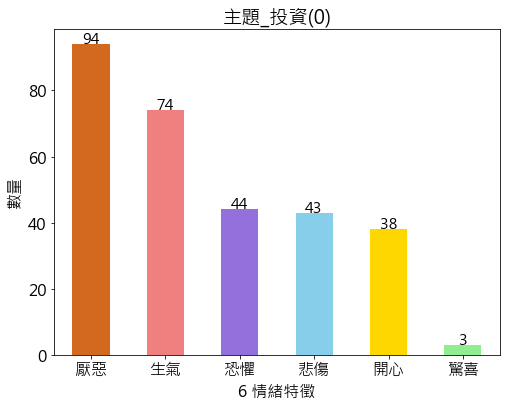

主題_投資(0) sentiment counts:
厭惡    94
生氣    74
恐懼    44
悲傷    43
開心    38
驚喜     3
dtype: int64
------------------------------


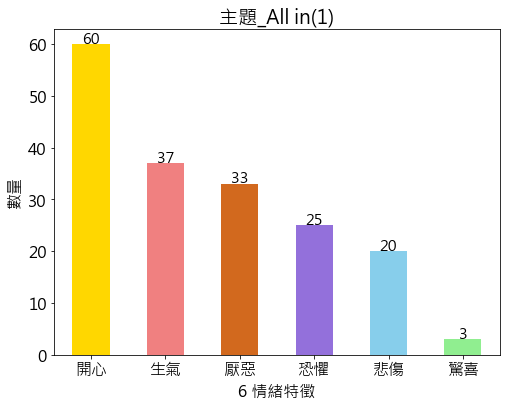

主題_All in(1) sentiment counts:
開心    60
生氣    37
厭惡    33
恐懼    25
悲傷    20
驚喜     3
dtype: int64
------------------------------


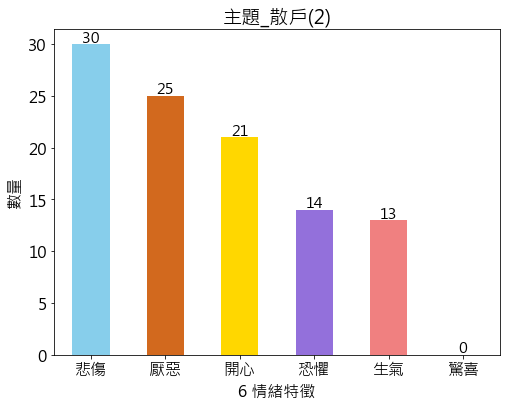

主題_散戶(2) sentiment counts:
悲傷    30
厭惡    25
開心    21
恐懼    14
生氣    13
驚喜     0
dtype: int64
------------------------------


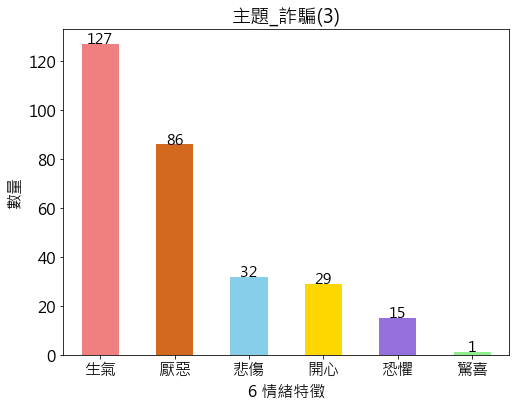

主題_詐騙(3) sentiment counts:
生氣    127
厭惡     86
悲傷     32
開心     29
恐懼     15
驚喜      1
dtype: int64
------------------------------


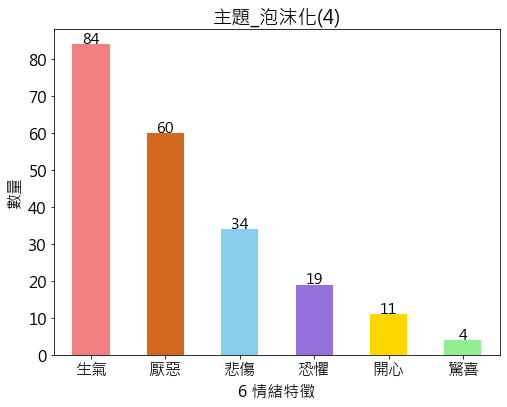

主題_泡沫化(4) sentiment counts:
生氣    84
厭惡    60
悲傷    34
恐懼    19
開心    11
驚喜     4
dtype: int64
------------------------------


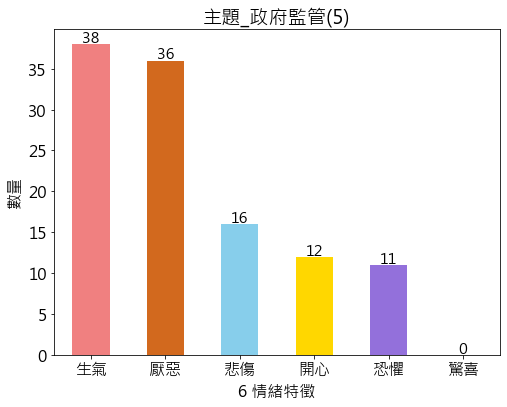

主題_政府監管(5) sentiment counts:
生氣    38
厭惡    36
悲傷    16
開心    12
恐懼    11
驚喜     0
dtype: int64
------------------------------


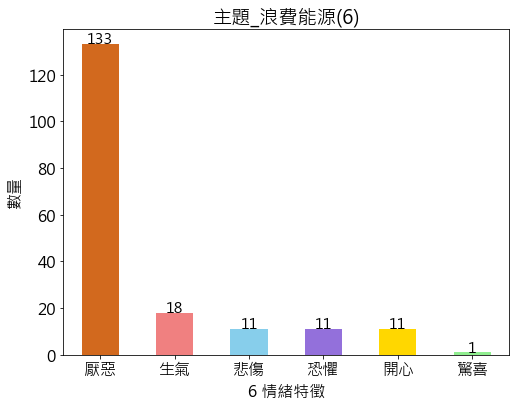

主題_浪費能源(6) sentiment counts:
厭惡    133
生氣     18
悲傷     11
恐懼     11
開心     11
驚喜      1
dtype: int64
------------------------------


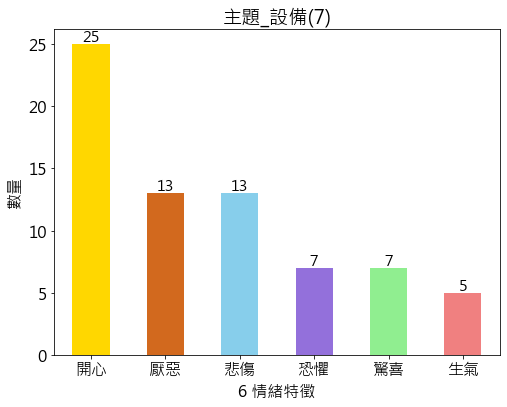

主題_設備(7) sentiment counts:
開心    25
厭惡    13
悲傷    13
恐懼     7
驚喜     7
生氣     5
dtype: int64
------------------------------


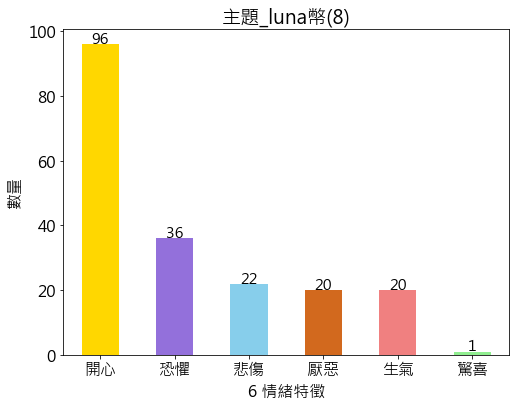

主題_luna幣(8) sentiment counts:
開心    96
恐懼    36
悲傷    22
厭惡    20
生氣    20
驚喜     1
dtype: int64
------------------------------


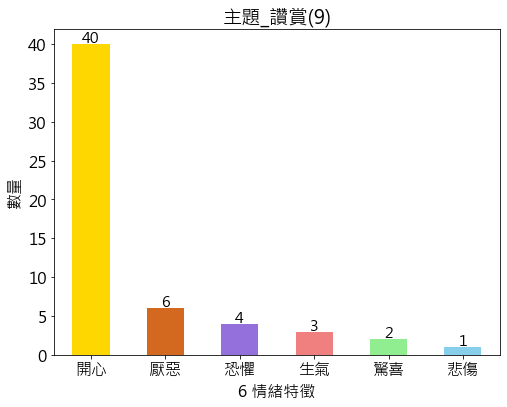

主題_讚賞(9) sentiment counts:
開心    40
厭惡     6
恐懼     4
生氣     3
驚喜     2
悲傷     1
dtype: int64
------------------------------


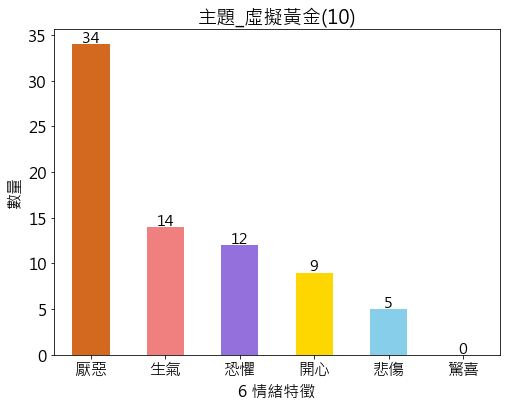

主題_虛擬黃金(10) sentiment counts:
厭惡    34
生氣    14
恐懼    12
開心     9
悲傷     5
驚喜     0
dtype: int64
------------------------------


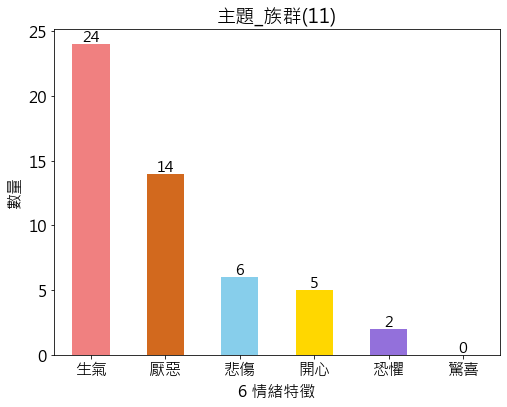

主題_族群(11) sentiment counts:
生氣    24
厭惡    14
悲傷     6
開心     5
恐懼     2
驚喜     0
dtype: int64
------------------------------


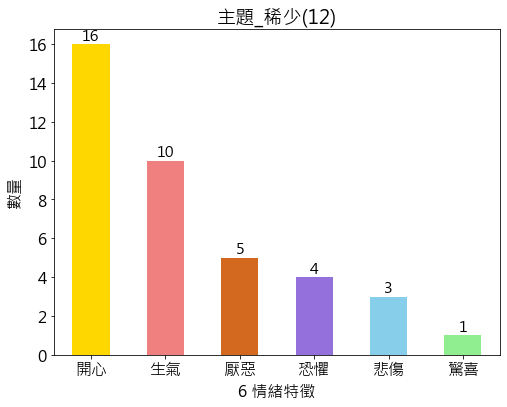

主題_稀少(12) sentiment counts:
開心    16
生氣    10
厭惡     5
恐懼     4
悲傷     3
驚喜     1
dtype: int64
------------------------------


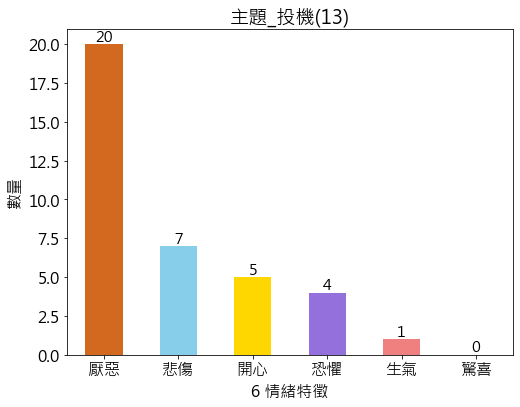

主題_投機(13) sentiment counts:
厭惡    20
悲傷     7
開心     5
恐懼     4
生氣     1
驚喜     0
dtype: int64
------------------------------


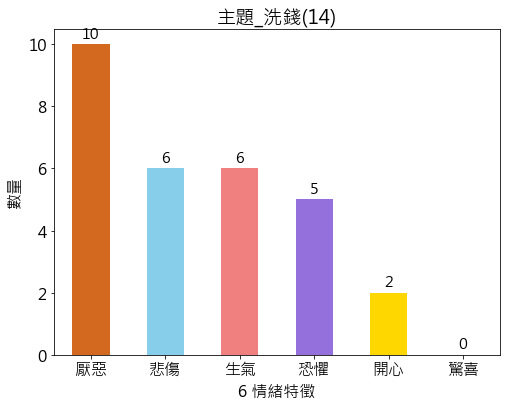

主題_洗錢(14) sentiment counts:
厭惡    10
悲傷     6
生氣     6
恐懼     5
開心     2
驚喜     0
dtype: int64
------------------------------


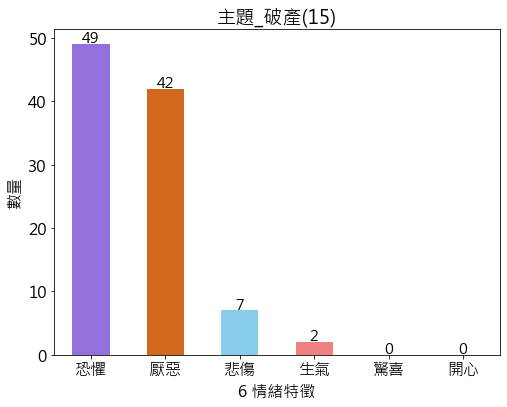

主題_破產(15) sentiment counts:
恐懼    49
厭惡    42
悲傷     7
生氣     2
驚喜     0
開心     0
dtype: int64
------------------------------


In [14]:
topics = ['主題_投資(0)','主題_All in(1)', '主題_散戶(2)', '主題_詐騙(3)', '主題_泡沫化(4)', '主題_政府監管(5)',
          '主題_浪費能源(6)', '主題_設備(7)', '主題_luna幣(8)', '主題_讚賞(9)', '主題_虛擬黃金(10)',
          '主題_族群(11)', '主題_稀少(12)', '主題_投機(13)', '主題_洗錢(14)', '主題_破產(15)']

for topic_num in range(0,16):
    # 繪製情感計數直方圖
    topic_counts = plot_sentiment_counts1(df_inner_M5, topic_num) # df_inner_M5  
    # 顯示主題情感計數
    print(f'{topics[topic_num]} sentiment counts:')    
    print(topic_counts)
    print('-' * 30)